<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

#  Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For this assignment, you will complete a series of exercises exploring movie rating data from IMDb.

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

In [1]:
# Imports

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

#### 1. Read in 'imdb.csv' and store it in a DataFrame named movies.

In [2]:
imdb = pd.read_csv('imdb.csv')
imdb.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### 2. Check the number of rows and columns.

In [3]:
imdb.shape

(979, 6)

#### 3. Check the data type of each column.

In [4]:
imdb.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### 4. Find the number of missing values in each column.

In [5]:
imdb.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### 5. Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
imdb['duration'].sort_values()

389     64
338     66
258     67
293     68
88      68
      ... 
445    220
142    224
78     229
157    238
476    242
Name: duration, Length: 979, dtype: int64

#### 6. Calculate the average duration of movies in this dataset.

In [7]:
imdb['duration'].mean()

120.97957099080695

#### 7. Calculate the average duration for each genre.

In [8]:
imdb.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

#### 8. Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [9]:
imdb[imdb['duration'] >= 120]['star_rating'].mean()

7.948898678414097

In [10]:
imdb[imdb['duration'] < 120]['star_rating'].mean()

7.838666666666665

## Plotting with pandas:

#### 9. Create a histogram of movie duration, choosing an "appropriate" number of bins.

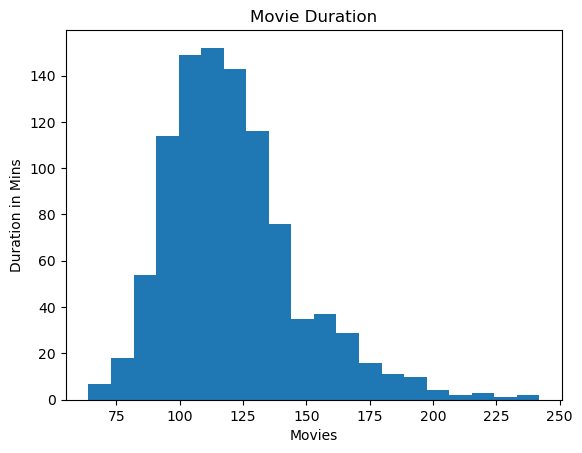

In [11]:
imdb['duration'].plot(kind = 'hist', bins = 20)

plt.xlabel('Movies')
plt.ylabel('Duration in Mins')
plt.title('Movie Duration');

#### 10. Use a box plot to display that same data.

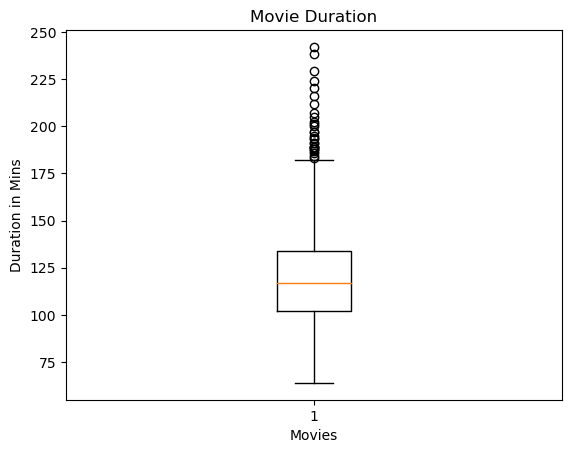

In [12]:
plt.boxplot(imdb['duration'])

plt.xlabel('Movies')
plt.ylabel('Duration in Mins')
plt.title('Movie Duration');


#### 11. Find how many movies have each of the content ratings, then use a visualization to display that same data, including a title and x and y labels.

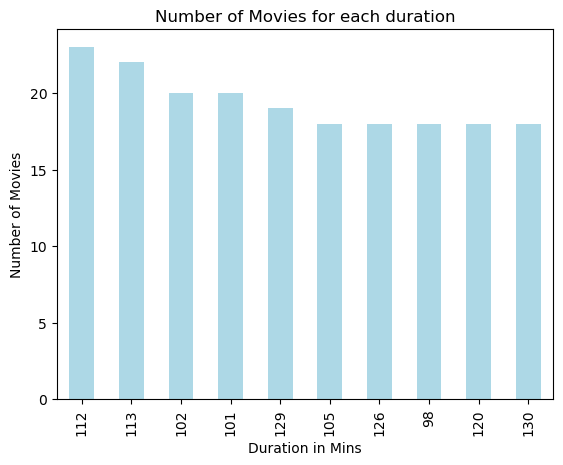

In [13]:
imdb['duration'].value_counts().head(10).plot(kind = 'bar', color = 'lightblue')

plt.xlabel('Duration in Mins')
plt.ylabel('Number of Movies')
plt.title('Number of Movies for each duration');

#### 12. Use a visualization to detect whether there is a relationship between duration and star rating.

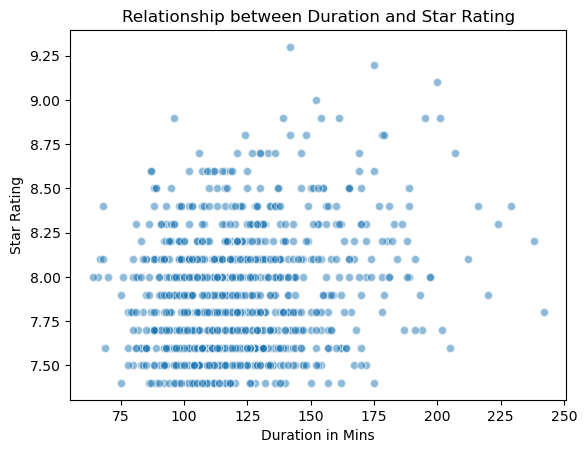

In [14]:
plt.scatter(imdb['duration'], imdb['star_rating'], alpha = 0.5, edgecolors = 'w')

plt.xlabel('Duration in Mins')
plt.ylabel('Star Rating')
plt.title('Relationship between Duration and Star Rating');

## Challenge questions

---

Below are a selection of **optional** challenge questions. Please complete them if you have time, or save them for additional practice/review in the future!

#### 13. Visualize the relationship between content rating and duration.

#### 14. Determine the top rated movie (by star rating) for each genre.

In [15]:
imdb.groupby('genre')[['title', 'star_rating']].value_counts()

genre    title                           star_rating
Action   300                             7.8            1
         A Fistful of Dollars            8.1            1
         Total Recall                    7.5            1
         United 93                       7.6            1
         V for Vendetta                  8.2            1
                                                       ..
Western  Once Upon a Time in the West    8.6            1
         Rio Bravo                       8.1            1
         The Good, the Bad and the Ugly  8.9            1
         The Outlaw Josey Wales          7.9            1
         Unforgiven                      8.3            1
Name: count, Length: 979, dtype: int64

#### 15. Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [18]:
imdb[imdb.duplicated('title', keep = False)]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### 16. Calculate the average star rating for each genre, but only include genres with at least 10 movies. 

Below are several ideas for how to approach this one - feel free to just follow one route, or challenge yourself by trying to tackle all of them!

Option 1: manually create a list of relevant genres, then filter using that list

Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

Option 3: calculate the average star rating for all genres, then filter using a boolean Series

Option 4: aggregate by count and mean, then filter using the count

In [27]:
ten_movies = imdb.groupby('genre')['star_rating'].agg(['count', 'mean'])

In [28]:
ten_genre_movies = ten_movies[ten_movies['count'] >= 10]
ten_genre_movies

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


#### 17. Find something "interesting" using the actors data - this one is completely open-ended!